In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [3]:
prices = data['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices.reshape(-1, 1))
train_size = int(len(prices) * 0.8)
train_data, test_data = prices[:train_size], prices[train_size:]

In [5]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)
look_back = 20
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [7]:
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=100, batch_size=64)


Epoch 1/100
38/38 [==============================] - 4s 50ms/step - loss: 0.0028
Epoch 2/100
38/38 [==============================] - 1s 30ms/step - loss: 5.9447e-05
Epoch 3/100
38/38 [==============================] - 1s 26ms/step - loss: 3.3312e-05
Epoch 4/100
38/38 [==============================] - 1s 26ms/step - loss: 3.2593e-05
Epoch 5/100
38/38 [==============================] - 1s 26ms/step - loss: 3.2585e-05
Epoch 6/100
38/38 [==============================] - 1s 25ms/step - loss: 3.2413e-05
Epoch 7/100
38/38 [==============================] - 1s 26ms/step - loss: 3.0919e-05
Epoch 8/100
38/38 [==============================] - 1s 26ms/step - loss: 3.0069e-05
Epoch 9/100
38/38 [==============================] - 1s 25ms/step - loss: 2.9833e-05
Epoch 10/100
38/38 [==============================] - 1s 26ms/step - loss: 2.8665e-05
Epoch 11/100
38/38 [==============================] - 1s 26ms/step - loss: 2.8552e-05
Epoch 12/100
38/38 [==============================] - 2s 43ms/step 

In [8]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


19/19 [==============================] - 0s 6ms/step


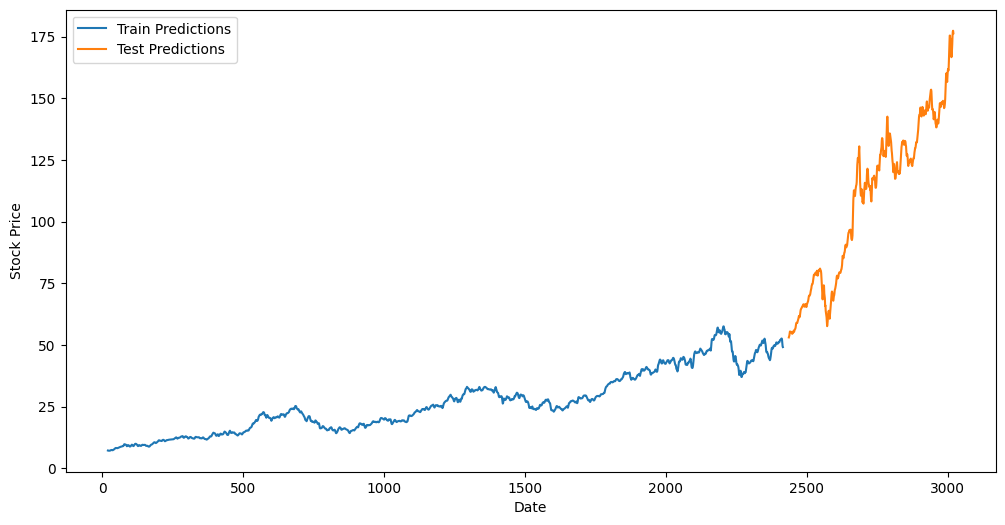

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(look_back, len(train_predict) + look_back), train_predict, label='Train Predictions')
plt.plot(np.arange(2*look_back + len(train_predict), 2*look_back + len(train_predict) + len(test_predict)), test_predict, label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()